In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [2]:
data_path = "../data/raw/insurance.csv"
df = pd.read_csv(data_path)

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The dataset contains demographic and health-related features along with annual medical charges. No missing values are present, making it suitable for regression modeling without imputation.

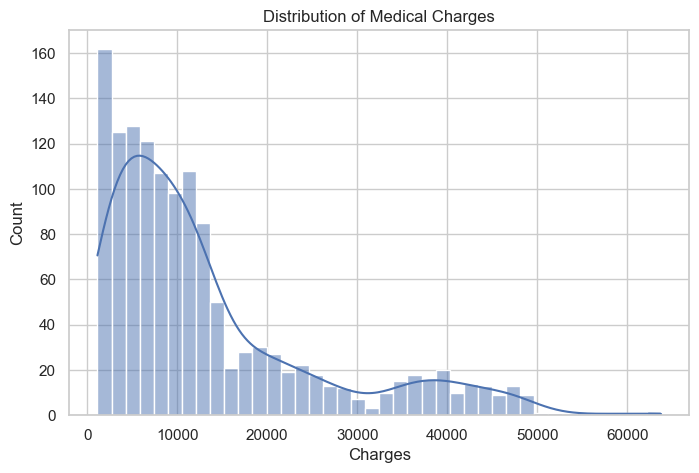

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df["charges"], bins=40, kde=True)
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()


Medical charges are heavily right-skewed, indicating the presence of a small number of high-cost individuals. This suggests that a log transformation of the target variable may improve model performance.

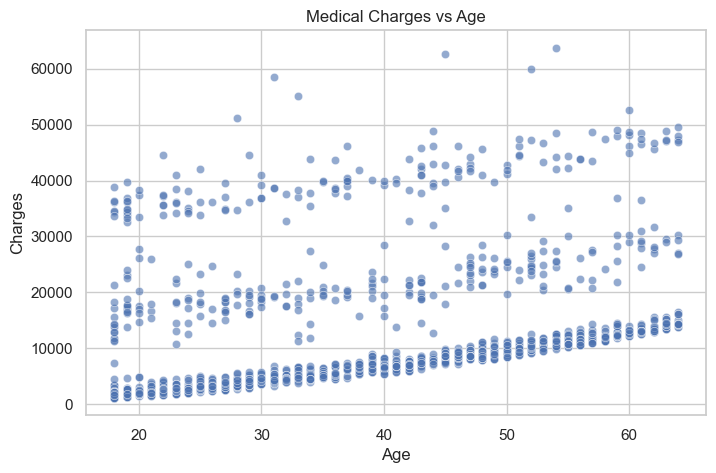

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="age", y="charges", data=df, alpha=0.6)
plt.title("Medical Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


Medical costs generally increase with age, though variability widens among older individuals, suggesting additional risk factors influence cost beyond age alone.

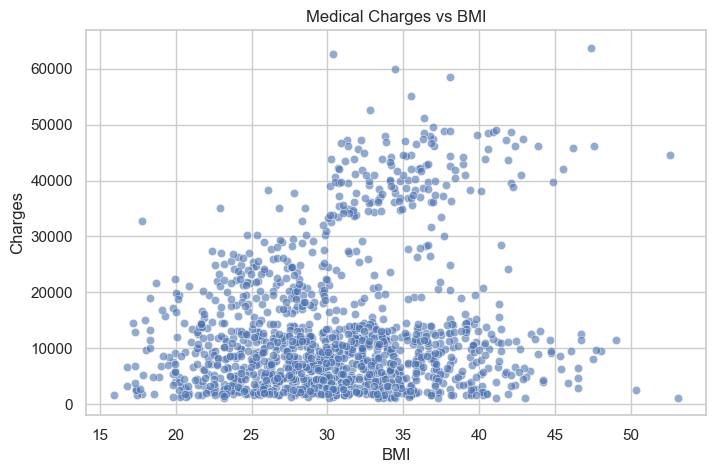

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="bmi", y="charges", data=df, alpha=0.6)
plt.title("Medical Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


Higher BMI values are associated with increased medical costs, particularly among extreme values, indicating BMI may be an important cost driver.

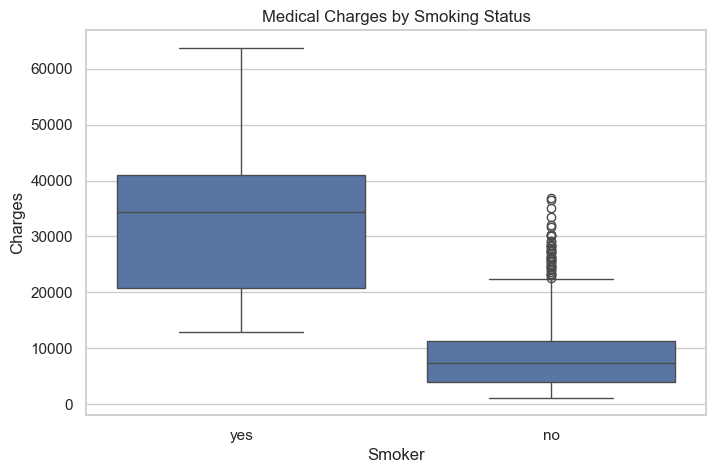

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Medical Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()


Smoking status has a dramatic impact on medical costs. Smokers exhibit substantially higher median and maximum charges compared to non-smokers, making smoking one of the strongest predictors of healthcare cost.

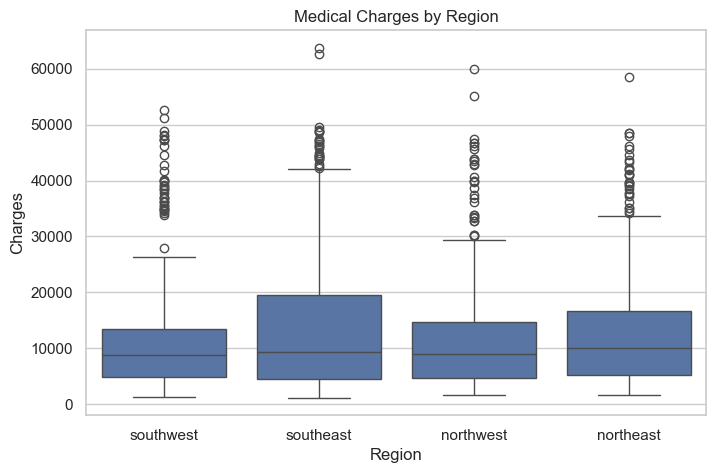

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="region", y="charges", data=df)
plt.title("Medical Charges by Region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()


Regional differences in medical charges exist but are less pronounced than differences driven by behavioral and health risk factors such as smoking.

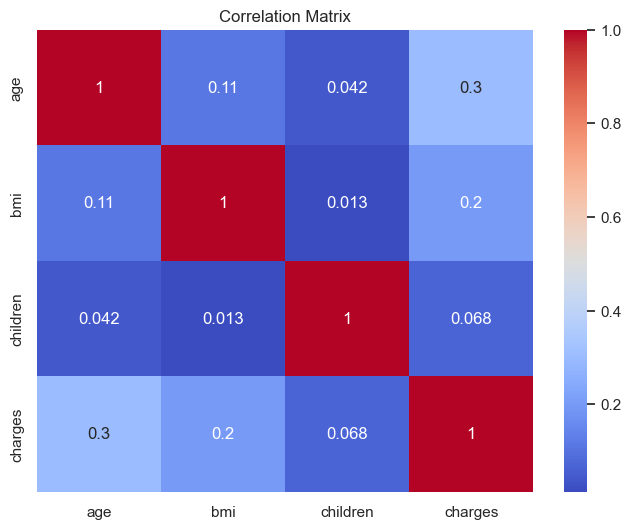

In [9]:
plt.figure(figsize=(8,6))
corr = df[["age", "bmi", "children", "charges"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Age and BMI show moderate correlation with medical charges, while the number of children has minimal correlation, suggesting household size is a weaker cost driver.

Exploratory analysis reveals that healthcare costs are highly right-skewed, driven by a small subset of high-cost individuals. Smoking status emerges as the strongest predictor of medical charges, followed by age and BMI. Regional differences exist but contribute less to cost variability. These findings motivate feature engineering, log transformation of the target variable, and the use of both linear and non-linear models in subsequent analysis.